Final Project

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# The Data #
df = pd.read_csv('train.csv', usecols=range(1,8))

df.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
# total words #
df.index = range(159571)
df['comment_text'].apply(lambda x: len(x.split(' '))).sum()

10829599

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


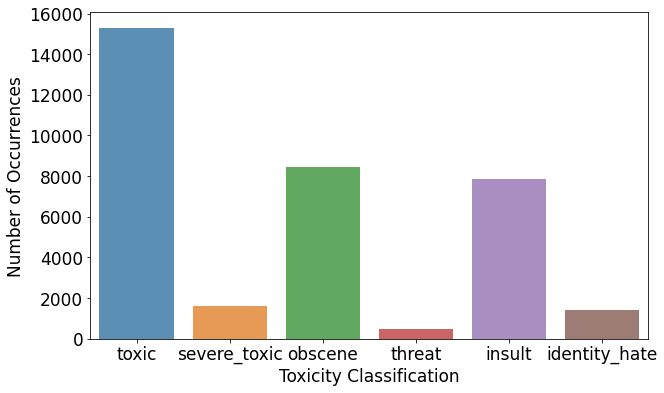

In [ ]:
value = np.zeros(6)
value[0] = df['toxic'].sum()
value[1] = df['severe_toxic'].sum()
value[2] = df['obscene'].sum()
value[3] = df['threat'].sum()
value[4] = df['insult'].sum()
value[5] = df['identity_hate'].sum()

classification = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.figure(figsize=(10,6))
x = sns.barplot(classification, value, alpha=0.8)

plt.ylabel('Number of Occurrences', fontsize=17)
plt.xlabel('Toxicity Classification', fontsize=17)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=17)
plt.show();

In [ ]:
print(value)
print(value / df.shape[0] * 100)
print(df.shape[0])

[15294.  1595.  8449.   478.  7877.  1405.]
[9.5844483  0.99955506 5.29482174 0.29955318 4.93636062 0.8804858 ]
159571
